In [ ]:
pip install ipykernel

In [ ]:
pip install pyquil

In [ ]:
pip install scipy

In [ ]:
pip install Cython

In [ ]:
pip install h5py

In [ ]:
# need two lines above for qutip cython and h5py
pip install qutip

In [ ]:
# Was missing install for code below
!pip install matplotlib

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [ ]:
# Start of Warsaw code

%matplotlib inline
#import matplotlib.pyplot as plt
#from collections import Counter
#import numpy as np

def plot_state_histogram(result):
    total_count = len(result[0])
    n_qubits = len(result)
    all_states = []
    
    for i in range(total_count):
        state = []
        for j in range(n_qubits):
            state.append(result[j][i])
        all_states.append(tuple(state))

    states_with_counts = Counter(all_states).most_common()[::-1]    
    
    states = np.array(states_with_counts)[:,0]
    probs = (np.array(states_with_counts)[:,1]/total_count).astype(float)
    n = len(states_with_counts)
    plt.barh(range(n), probs, tick_label=states)
    plt.show()

In [ ]:
import cmath
from qutip import Bloch
from pyquil.api import WavefunctionSimulator


def get_vector(alpha, beta):
    """
    Function to compute 3D Cartesian coordinates
    from 2D qubit vector.
    """

    # get phases
    angle_alpha = cmath.phase(alpha)
    angle_beta = cmath.phase(beta)

    # avoiding wrong normalization due to rounding errors
    if cmath.isclose(angle_alpha, cmath.pi):
        angle_alpha = 0
    if cmath.isclose(angle_beta, cmath.pi):
        angle_beta = 0
        
    if (angle_beta < 0 and angle_alpha < angle_beta) or (angle_beta > 0 and angle_alpha > angle_beta):
            denominator = cmath.exp(1j*angle_beta)
    else:
            denominator = cmath.exp(1j*angle_alpha)

    # eliminate global phase
    alpha_new = alpha/denominator
    beta_new = beta/denominator

    # special case to avoid division by zero
    if abs(alpha) == 0 or abs(beta) == 0:
        if alpha == 0:
            return [0,0,-1]
        else:
            return [0,0,1]
    else:
        # compute theta and phi from alpha and beta
        theta = 2*cmath.acos(alpha_new)
        phi = -1j*cmath.log(beta_new/cmath.sin(theta/2))

        # compute the Cartesian coordinates
        x = cmath.sin(theta)*cmath.cos(phi)
        y = cmath.sin(theta)*cmath.sin(phi)
        z = cmath.cos(theta)

    return [x.real,y.real,z.real]

def plot_quantum_state(program):
    """
    Thin function to abstract the plotting on the Bloch sphere.
    """
    wfn = WavefunctionSimulator().wavefunction(program)
    amplitudes = wfn.amplitudes
    print(amplitudes)
    bloch_sphere = Bloch()
    vec = get_vector(amplitudes[0], amplitudes[1])
    bloch_sphere.add_vectors(vec)
    bloch_sphere.show()
    bloch_sphere.clear()

In [ ]:
# Start of basic programs above was loading for plotting

from pyquil import Program, get_qc
from pyquil.gates import *
from pyquil.api import WavefunctionSimulator

In [ ]:
# construct an empty program
p = Program()
qc = get_qc('2q-qvm')
#add if you wanted more servers with different parameters
#qc_2 = get_qc('3q-qvm')
#qc_3 = get_qc('4q-qvm', noisy=True)
result = qc.run_and_measure(p, trials=10)
print(result)

In [ ]:
def run_and_visualize(program, n_qubits=2, trials=10, qc=None):
    if qc is None:
        qc = get_qc(str(n_qubits)+'q-qvm')
    
    result = qc.run_and_measure(program, trials=trials)
    if trials <= 100:
        for i in range(n_qubits):
            print(result[i])
    wfn = WavefunctionSimulator().wavefunction(p)
    print("wavefunction:", wfn)
    print("Probabilities:", wfn.probabilities())
    plot_state_histogram(result)

In [ ]:
# construct an equal superposition
p = Program(H(0))
run_and_visualize(p, n_qubits=1, trials=100)

In [ ]:
# construct an equal superposition on N qubits
p = Program()
#number of qbits
N = 5
for i in range(N):
    # add gate to notation
    p += (H(i))
print(p)
# with number of trials you are looking for a uniform distribution on plot same percentage
run_and_visualize(p, n_qubits=N, trials=10000)

In [ ]:
# construct a Bell State (|00> + |11>)
p = Program(H(0), CNOT(0, 1))
# or can add gates one by one like below
# p += H(0)
# p += CNOT(0,1)

In [ ]:
# construct a GHZ state (|00...0> + |11...1>)
N = 5
p = Program(H(0))
for i in range(1, N):
    p += Program(CNOT(0, i))
run_and_visualize(p, n_qubits=N)

In [ ]:
# Let's explore some basic gates: I, X, Y, Z, RX, RY, RZ, H, CNOT, SWAP

In [ ]:
# identity gate
p = Program(I(0))
run_and_visualize(p,1)

In [ ]:
plot_quantum_state(p)

In [ ]:
# Hadamard gate
p = Program(H(0))
run_and_visualize(p,1)

In [ ]:
plot_quantum_state(p)

In [ ]:
# X gate
p = Program(X(0))
run_and_visualize(p,1)

In [ ]:
plot_quantum_state(p)

In [ ]:
# RX gate
p = Program(RX(np.pi/4,0))
run_and_visualize(p,1)

#plot_quantum_state(p)

In [ ]:
plot_quantum_state(p)

In [ ]:
# CNOT gate first is index control bit and other act on CNOT has to act on another gate
p = Program(H(0))
p += CNOT(0, 1)
run_and_visualize(p,2)

In [ ]:
plot_quantum_state(p)


In [ ]:
p = Program(H(0))
# p = Program(H(0), RZ(np.pi/2, 0))
# p += CNOT(0, 1)
# p += H(0)
# p += H(1)
# the below (p,2) 2 stands for number of states you are running
run_and_visualize(p, 2)

In [ ]:
# Measurements

In [ ]:
qc = get_qc('2q-qvm')
p = Program()
p += H(0)
result = qc.run_and_measure(p, trials=10)
print(result[0])

In [ ]:
qc = get_qc('2q-qvm')
p = Program()
p += H(0)
#ro is short for readout 
# below is a regiater for bits 16
ro = p.declare('ro', 'BIT', 16)
p += MEASURE(0, ro[0])
# add another measure 
p += MEASURE(1, ro[1])
result = qc.run(p)

print(result)

In [ ]:
qc = get_qc('2q-qvm')
p = Program()
p += X(0)
#ro is short for readout
ro = p.declare('ro', 'BIT', 16)
p += MEASURE(0, ro[0])
#p += H(0)
result = []
for i in range(100):
    result.append(qc.run(p)[0,0])

print(np.array(result))

In [ ]:
# The measurement colapses the wavefunction  - quantum state gone
# so you cant perform an operation on a qbit after it is measured

In [ ]:
qc = get_qc('2q-qvm')
p = Program()
p += X(0)
p += H(1)
#ro is short for readout
ro = p.declare('ro', 'BIT', 16)
p += MEASURE(0, ro[0])
# p += MEASURE(1, ro[1])
# p += H(0)

# python program to use loops instead for loop
p.wrap_in_numshots_loop(100)
result = qc.run(p)

print(result[:])

In [41]:
#Noise 
# Did it collapse states
# gate fidelity
# reader error
# coherence errors - only last limited time - longer exists it will go to ground state zero

[1 1 1 1 0 0 0 1 0 0]
wavefunction: (0.7071067812+0j)|0> + (0.7071067812+0j)|1>
Probabilities: [0.5 0.5]


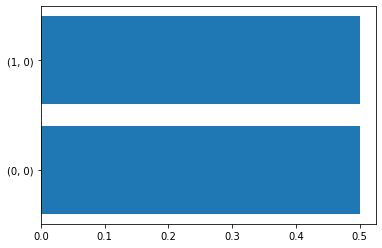

In [42]:
qc = get_qc('2q-qvm', noisy=True)
p = Program(H(0))
run_and_visualize(p, n_qubits=1, qc=qc)

[1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
wavefunction: (1+0j)|1>
Probabilities: [0. 1.]


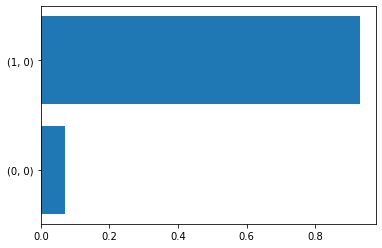

In [43]:
# will not work just w noisy=True
qc = get_qc('2q-qvm', noisy=True)
p = Program(X(0))
run_and_visualize(p, n_qubits=1, qc=qc, trials=100)

In [47]:
# have to pass as_qvm=True for noise not just 
p = Program(X(0))
qc = get_qc('2q', as_qvm=True, noisy=True)
result = qc.run_and_measure(p, trials=10000)
print(result[0].sum())

9046


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1]
wavefunction: (1+0j)|1>
Probabilities: [0. 1.]


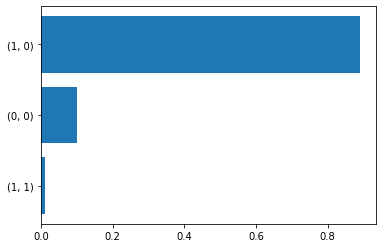

In [48]:

run_and_visualize(p, n_qubits=1, qc=qc, trials=100)

wavefunction: (0.3535533906+0j)|000> + (0.3535533906+0j)|001> + (0.3535533906+0j)|010> + (0.3535533906+0j)|011> + (0.3535533906+0j)|100> + (0.3535533906+0j)|101> + (0.3535533906+0j)|110> + (0.3535533906+0j)|111>
Probabilities: [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


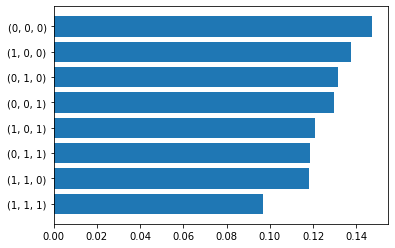

In [49]:

qc = get_qc('3q', as_qvm=True, noisy=True)
p = Program(H(0), H(1), H(2))
run_and_visualize(p, n_qubits=3, qc=qc,trials=10000)

wavefunction: (0.3535533906+0j)|000> + (0.3535533906+0j)|001> + (0.3535533906+0j)|010> + (0.3535533906+0j)|011> + (0.3535533906+0j)|100> + (0.3535533906+0j)|101> + (0.3535533906+0j)|110> + (0.3535533906+0j)|111>
Probabilities: [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


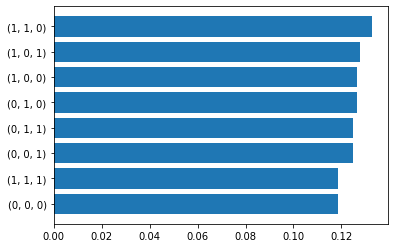

In [50]:
qc = get_qc('3q', as_qvm=True, noisy=False)
p = Program(H(0), H(1), H(2))
run_and_visualize(p, n_qubits=3, qc=qc,trials=10000)

In [ ]:
# Connectivity

In [52]:
from pyquil import list_quantum_computers
# See quantum computers you can use
list_quantum_computers()

['Aspen-4-2Q-A',
 'Aspen-4-3Q-A',
 'Aspen-4-4Q-A',
 'Aspen-4-5Q-A',
 'Aspen-4-6Q-A',
 'Aspen-4-7Q-A',
 'Aspen-4-8Q-A',
 'Aspen-4-9Q-A',
 'Aspen-4-10Q-A',
 'Aspen-4-11Q-A',
 'Aspen-4-12Q-A',
 'Aspen-4-13Q-A',
 'Aspen-4-14Q-C',
 'Aspen-4-13Q-C',
 'Aspen-4-3Q-C',
 'Aspen-4-4Q-C',
 'Aspen-4-5Q-C',
 'Aspen-4-6Q-C',
 'Aspen-4-7Q-C',
 'Aspen-4-8Q-C',
 'Aspen-4-9Q-C',
 'Aspen-4-10Q-C',
 'Aspen-4-12Q-C',
 'Aspen-4-11Q-C',
 'Aspen-4-2Q-C',
 '9q-square-qvm',
 '9q-square-noisy-qvm']

In [58]:
#qc = get_qc('Aspen-1-2Q-B')
qc = get_qc('Aspen-4-10Q-A',as_qvm=True)
# qc = get_qc('Aspen-1-9Q-B',as_qvm=True)
# qc = get_qc('Aspen-1-15Q-A',as_qvm=True)
p = Program(I(0))
run_and_visualize(p, n_qubits=1, qc=qc, trials=100)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wavefunction: (1+0j)|0>
Probabilities: [1. 0.]


KeyError: 3

In [59]:
import networkx as nx
def visualize_topology(qc_name):
    qc = get_qc(qc_name, as_qvm=True)
    print("nodes:", qc.qubit_topology().nodes)
    print("edges:", qc.qubit_topology().edges)
    nx.draw(qc.qubit_topology())
    from matplotlib import pyplot as plt
    _ = plt.title(qc_name, fontsize=18)

nodes: [0, 1, 7, 2, 3, 15, 6, 10, 11, 12, 13, 14]
edges: [(0, 1), (0, 7), (1, 2), (7, 6), (2, 3), (2, 15), (15, 14), (10, 11), (11, 12), (12, 13), (13, 14)]


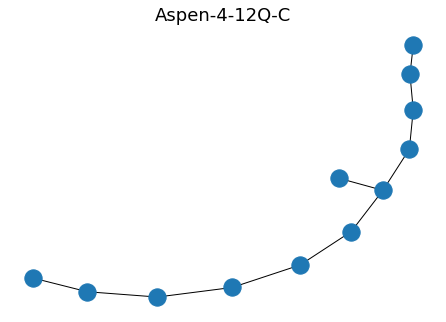

In [76]:
# topology on the chip
visualize_topology('Aspen-4-12Q-C')

In [78]:
# qc = get_qc('17q', as_qvm=True)
qc = get_qc('Aspen-4-12Q-C', as_qvm=True)
p = Program()
# all gates are not implemented on server - so H gate is complied to RZ(pi/2) 0 RX(pi/2) 0 below
# so the gates multiply and the server may have issue running that many gates
p += H(0)
p += CNOT(0, 14)
p += CNOT(0, 1)
#p += CNOT(0, 16)
#p += CNOT(0, 15)
print(qc.compile(p).program)

#list number gates run
len(qc.compile(p).program.split("\n")[1:-3])

RZ(pi/2) 0
RX(pi/2) 0
RZ(-pi/2) 1
RX(pi/2) 1
CZ 1 0
RZ(pi/2) 1
RX(pi/2) 1
RZ(pi) 2
RX(pi) 2
CZ 1 2
RZ(-pi/2) 1
RX(-pi/2) 1
RZ(pi/2) 2
RX(pi/2) 2
CZ 2 1
RZ(pi) 1
RX(pi/2) 1
RX(-pi/2) 2
CZ 1 2
RX(pi) 0
CZ 0 1
RZ(pi/2) 0
RX(pi) 0
RZ(pi) 1
RX(pi/2) 1
RZ(pi/2) 1
RZ(pi) 2
HALT



25

In [ ]:
#Parametric compilation

In [84]:
p = Program()
# rotation
ro = p.declare("ro", "BIT", 1)
theta_ref = p.declare("theta", "REAL")

p += RX(np.pi / 2, 0)
p += RZ(theta_ref, 0)
p += RX(-np.pi / 2, 0)
p += MEASURE(0, ro[0])

In [85]:

# Get a Quantum Virtual Machine to simulate execution
qc = get_qc("1q-qvm")
executable = qc.compile(p)
print(executable.program)

DECLARE ro BIT[1]
DECLARE theta REAL[1]
RX(pi/2) 0
RZ(theta[0]) 0
RX(-pi/2) 0
MEASURE 0 ro[0]
HALT



In [86]:
parametric_measurements = []

for theta in np.linspace(0, 2 * np.pi, 200):
    # Get the results of the run with the value we want to execute with
    bitstrings = qc.run(executable, {'theta': [theta]})
    # Store our results
    parametric_measurements.append(bitstrings)

RX(pi/2) 0
RZ(0) 0
RX(-pi/2) 0

[1.+0.j 0.+0.j]


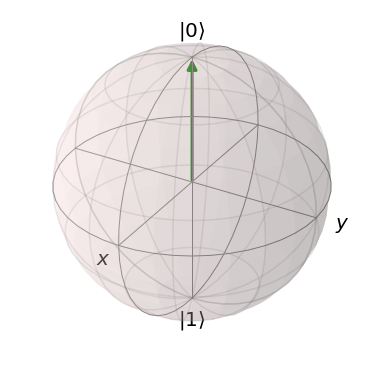

In [88]:
p = Program()
p += RX(np.pi / 2, 0)
p += RZ(0, 0)
p += RX(-np.pi / 2, 0)

print(p)
plot_quantum_state(p)

In [83]:
#Simple optimization example

In [89]:
p = Program()
ro = p.declare("ro", "BIT", 3)
theta_0_ref = p.declare("theta_0", "REAL")
p += RX(theta_0_ref, 0)
p += MEASURE(0, ro[0])
p.wrap_in_numshots_loop(1000);

In [90]:
qc = get_qc("1q", as_qvm=True, noisy=False)
executable = qc.compile(p)
print(executable.program)

DECLARE ro BIT[3]
DECLARE theta_0 REAL[1]
RZ(pi/2) 0
RX(pi/2) 0
RZ(theta_0[0]) 0
RX(-pi/2) 0
RZ(-pi/2) 0
MEASURE 0 ro[0]
HALT



In [91]:
bitstrings = qc.run(executable, {'theta_0': [0]})
bitstrings.sum()/1000

0.0

In [92]:
theta_0 = np.pi # The algorithm starts at pi
rate = 0.01 # Learning rate
precision = 1e-5 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 1000 # maximum number of iterations
iters = 0 #iteration counter
def cost_fun(x):
    return 2*(x - 0.5)

In [93]:
while previous_step_size > precision and iters < max_iters:
    prev_theta_0 = theta_0 #Store current x value in prev_x
    bitstrings = qc.run(executable, {'theta_0': [theta_0]})
    y = bitstrings.sum() / 100
    theta_0 = theta_0 - rate * cost_fun(y) #Grad descent
    previous_step_size = abs(theta_0 - prev_theta_0) #Change in x
    iters = iters + 1 #iteration count
    if iters%20 == 0:
        print("Iteration",iters,"\nY:",y, "\nTheta:", theta_0 / np.pi, "pi") #Print iterations
    
print("The optimal value of theta:", np.round(theta_0/np.pi,3), "pi")
print("Number of iterations:", iters)

Iteration 20 
Y: 2.51 
Theta: 0.3151244488869559 pi
Iteration 40 
Y: 0.95 
Theta: 0.19550359365908743 pi
Iteration 60 
Y: 0.58 
Theta: 0.16233570351873639 pi
Iteration 80 
Y: 0.51 
Theta: 0.15023992784375234 pi
The optimal value of theta: 0.147 pi
Number of iterations: 92
